# Diabetes Prediction Feature Engineering

In this project, we will perform the necessary data analysis and feature engineering steps before developing a machine learning model that can predict whether people will have diabetes when their characteristics are specified.


#### Dataset Story:

The dataset is part of the large dataset maintained at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.
Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix, the 5th largest city of the State of Arizona in the USA.

The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

**diabetes.csv**

**Pregnancies:** Number of pregnancies<br>
**Glucose:** 2-hour plasma glucose concentration in the oral glucose tolerance test<br>
**Blood Pressure:** Blood Pressure (mm Hg)<br>
**SkinThickness:** Skin Thickness<br>
**Insulin:** 2-hour serum insulin (mu U/ml)<br>
**DiabetesPedigreeFunction:** A function that calculates the probability of having diabetes based on pedigree<br>
**BMI:** Body mass index<br>
**Age:** Age (years)<br>
**Outcome:** Have the disease (1) or not (0)

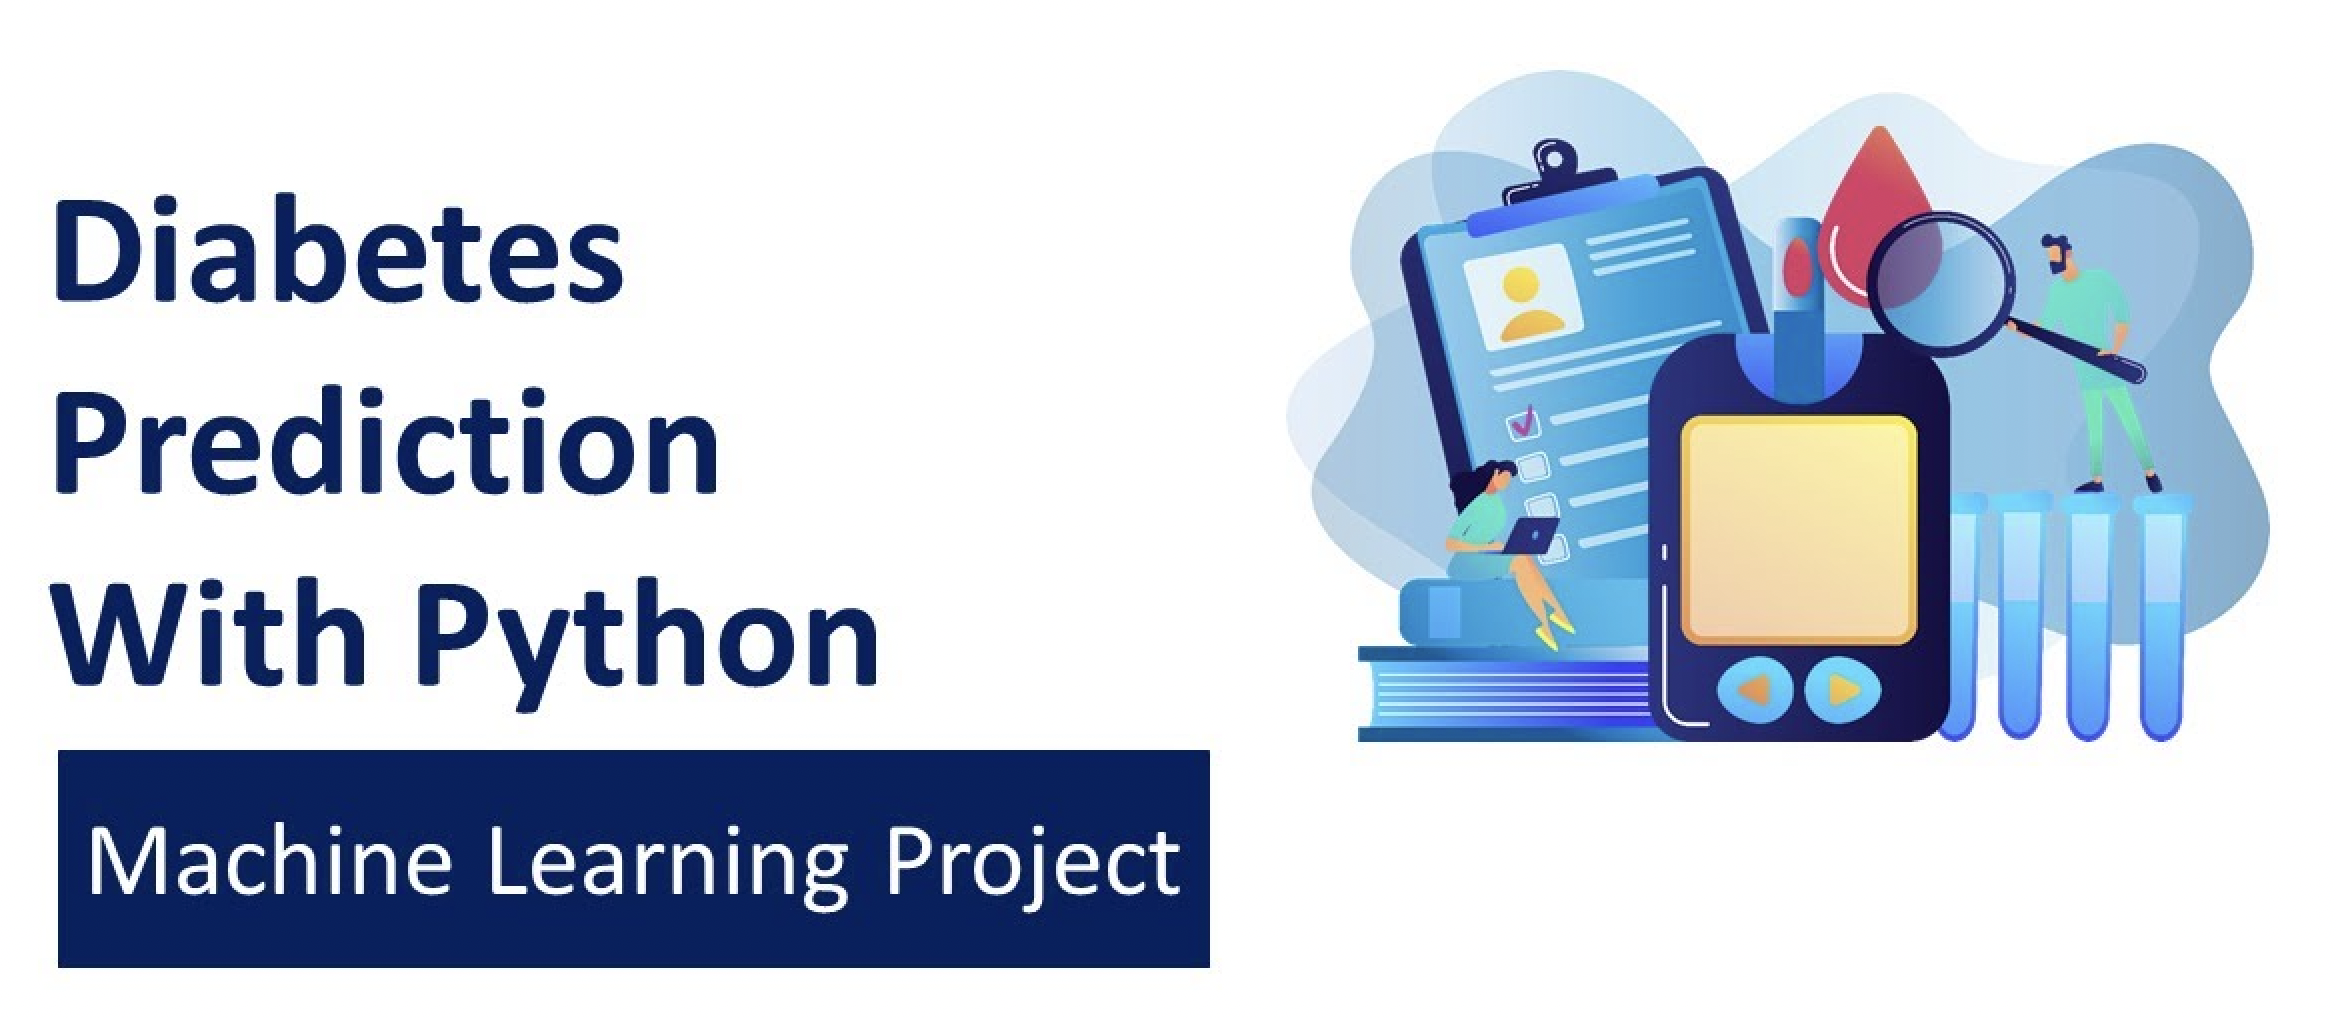

## 1. Importing the Libraries and Uploading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ = pd.read_csv('diabetes.csv')

In [3]:
df = df_
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


## 2. General Information About Dataset

In [4]:
def gen_info(df, box=True, column="DiabetesPedigreeFunction"):
    print(30*"#" + "Shape".center(30) + 30*"#")
    print(df.shape)
    print("\n"+ 30*"#" + "Types".center(30) + 30*"#")
    print(df.dtypes)
    print("\n"+ 30*"#" + "Head".center(30) + 30*"#")
    print(df.head())
    print("\n"+ 30*"#" + "Tail".center(30) + 30*"#")
    print(df.tail())
    print("\n"+ 30*"#" + "Missing Values".center(30) + 30*"#")
    print(df.isnull().sum())
    print("\n"+ 30*"#" + "Quantiles".center(30) + 30*"#")
    print(df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T)
    print("\n"+ 30*"#" + "BOX PLOT".center(30) + 30*"#")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

##############################            Shape             ##############################
(768, 9)

##############################            Types             ##############################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##############################             Head             ##############################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64          

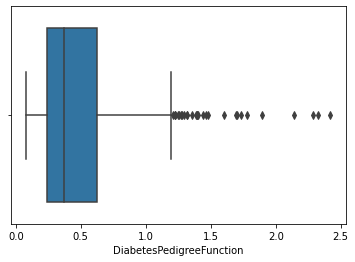

None


In [5]:
gen_info(df)

## 3. Discovery Data Analysis

Let's start with capturing numeric and categorical variables

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: 
        cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) 

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [8]:
    print(f'cat_cols: {cat_cols}\n')
    print(f'num_cols: {num_cols}\n')
    print(f'cat_but_car: {cat_but_car}\n')

cat_cols: ['Outcome']

num_cols: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

cat_but_car: []



## 4. Analyzing the numerical and categorical variables.

In [9]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


The 0 value of **Glucose, BloodPressure, SkinThickness, BMI, and Insulin** must be meaning of missing information, cause it can not be accurate for a human being. We will deal with these missing values later.

0    500
1    268
Name: Outcome, dtype: int64


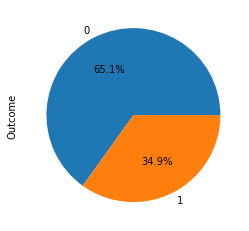

In [10]:
for i in cat_cols:
    print(df[i].value_counts())
    df[i].value_counts().plot(kind='pie',y='points',autopct='%1.1f%%')
    plt.show();

##### Mean of numeric variables relative to target variable:

         Pregnancies
Outcome             
0              3.298
1              4.866



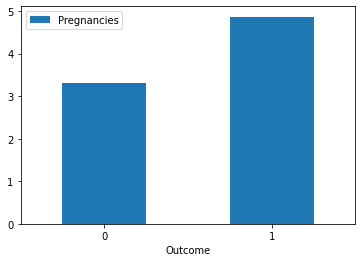

         Glucose
Outcome         
0        109.980
1        141.257



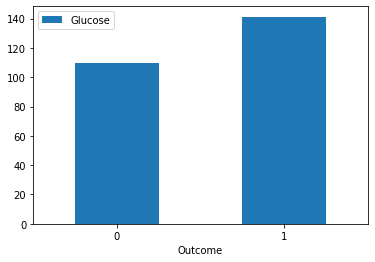

         BloodPressure
Outcome               
0               68.184
1               70.825



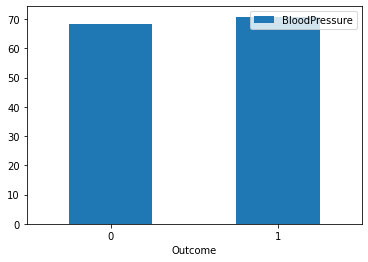

         SkinThickness
Outcome               
0               19.664
1               22.164



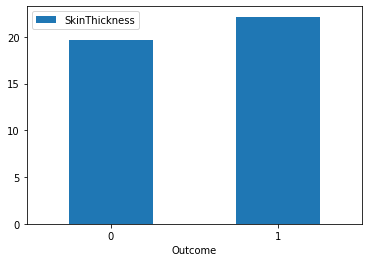

         Insulin
Outcome         
0         68.792
1        100.336



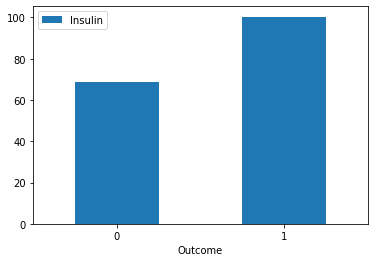

           BMI
Outcome       
0       30.304
1       35.143



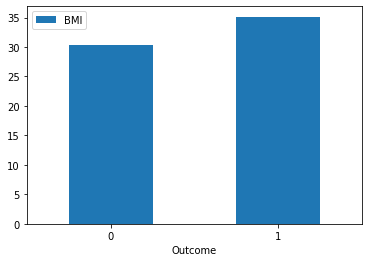

         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550



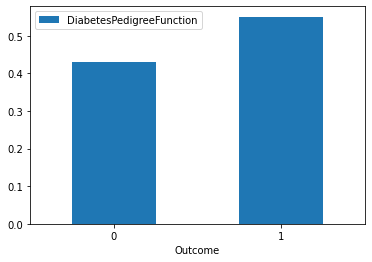

           Age
Outcome       
0       31.190
1       37.067



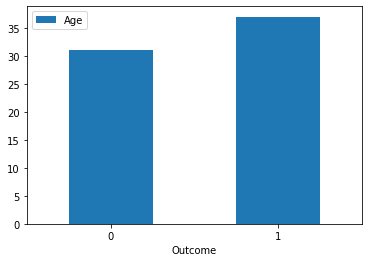

In [11]:
for i in num_cols:
    print(df.groupby('Outcome').agg({i:'mean'}),end='\n\n') 
    df.groupby('Outcome').agg({i:'mean'}).plot(kind='bar', rot = 0)
    plt.show()

In [12]:
df.groupby('Pregnancies').agg({'Outcome':['mean','count']})

Outcome      
               mean count
Pregnancies              
0             0.342   111
1             0.215   135
2             0.184   103
3             0.360    75
4             0.338    68
5             0.368    57
6             0.320    50
7             0.556    45
8             0.579    38
9             0.643    28
10            0.417    24
11            0.636    11
12            0.444     9
13            0.500    10
14            1.000     2
15            1.000     1
17            1.000     1

## 5. Examination of Missing Observation Units

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

But we already discovered that there are missing in the dataset with value of 0 instead of NaN.

Missing value columns: Glucose, BloodPressure, SkinThickness, and Insulin

In [14]:
missing_cols = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
missing_cols.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.600
1,85,66,29,0,26.600
2,183,64,0,0,23.300
3,89,66,23,94,28.100
4,137,40,35,168,43.100


In [15]:
for i in missing_cols.columns:
    print("There are "+ str(len(df.loc[(df[i]==0),i]))+" amounts of value 0 in "+i+" variable.")

There are 5 amounts of value 0 in Glucose variable.
There are 35 amounts of value 0 in BloodPressure variable.
There are 227 amounts of value 0 in SkinThickness variable.
There are 374 amounts of value 0 in Insulin variable.
There are 11 amounts of value 0 in BMI variable.


Let's change 0 to NaN

In [16]:
for i in missing_cols.columns:
    df.loc[(df[i]==0),i]=np.NaN

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

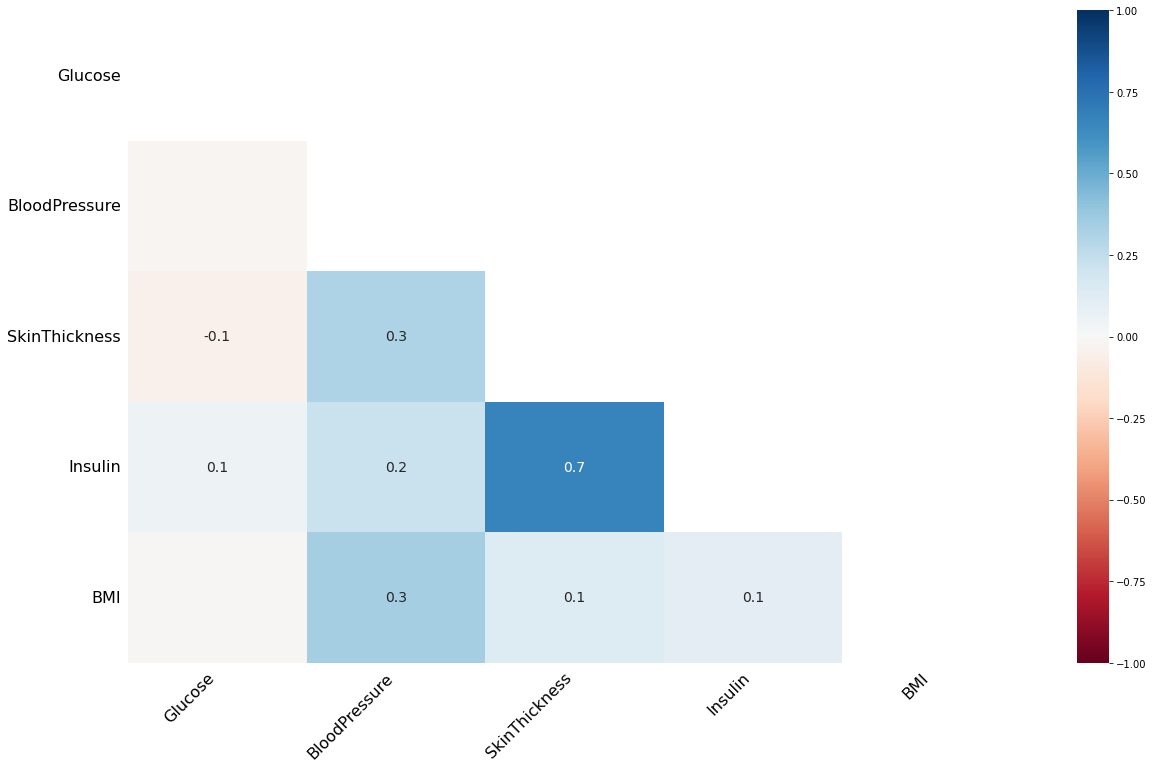

In [18]:
msno.heatmap(df)
plt.show()

Insulin and SkinTickness variables have missing observation units occur in a high correlation.

### 5.1 Filling NaN's with K-Nearest Neighbor(KNN) Algorithm

##### standardization of variables:

In [19]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,NaN,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,NaN,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,NaN,NaN,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1.000


##### Implementation of K-Nearest Neighbor (KNN):

In [20]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.353,0.671,0.490,0.304,0.385,0.315,0.234,0.483,1.000
1,0.059,0.265,0.429,0.239,0.051,0.172,0.117,0.167,0.000
2,0.471,0.897,0.408,0.274,0.269,0.104,0.254,0.183,1.000
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0.000
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1.000


Now that we have filled in our missing values, let's reverse the standardization process.

In [21]:
df = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no NaN anymore :)

## 6. Outlier Analysis

##### I will do Multivariate Outlier Analysis: Local Outlier Factor (LOF) for outlier analysis.

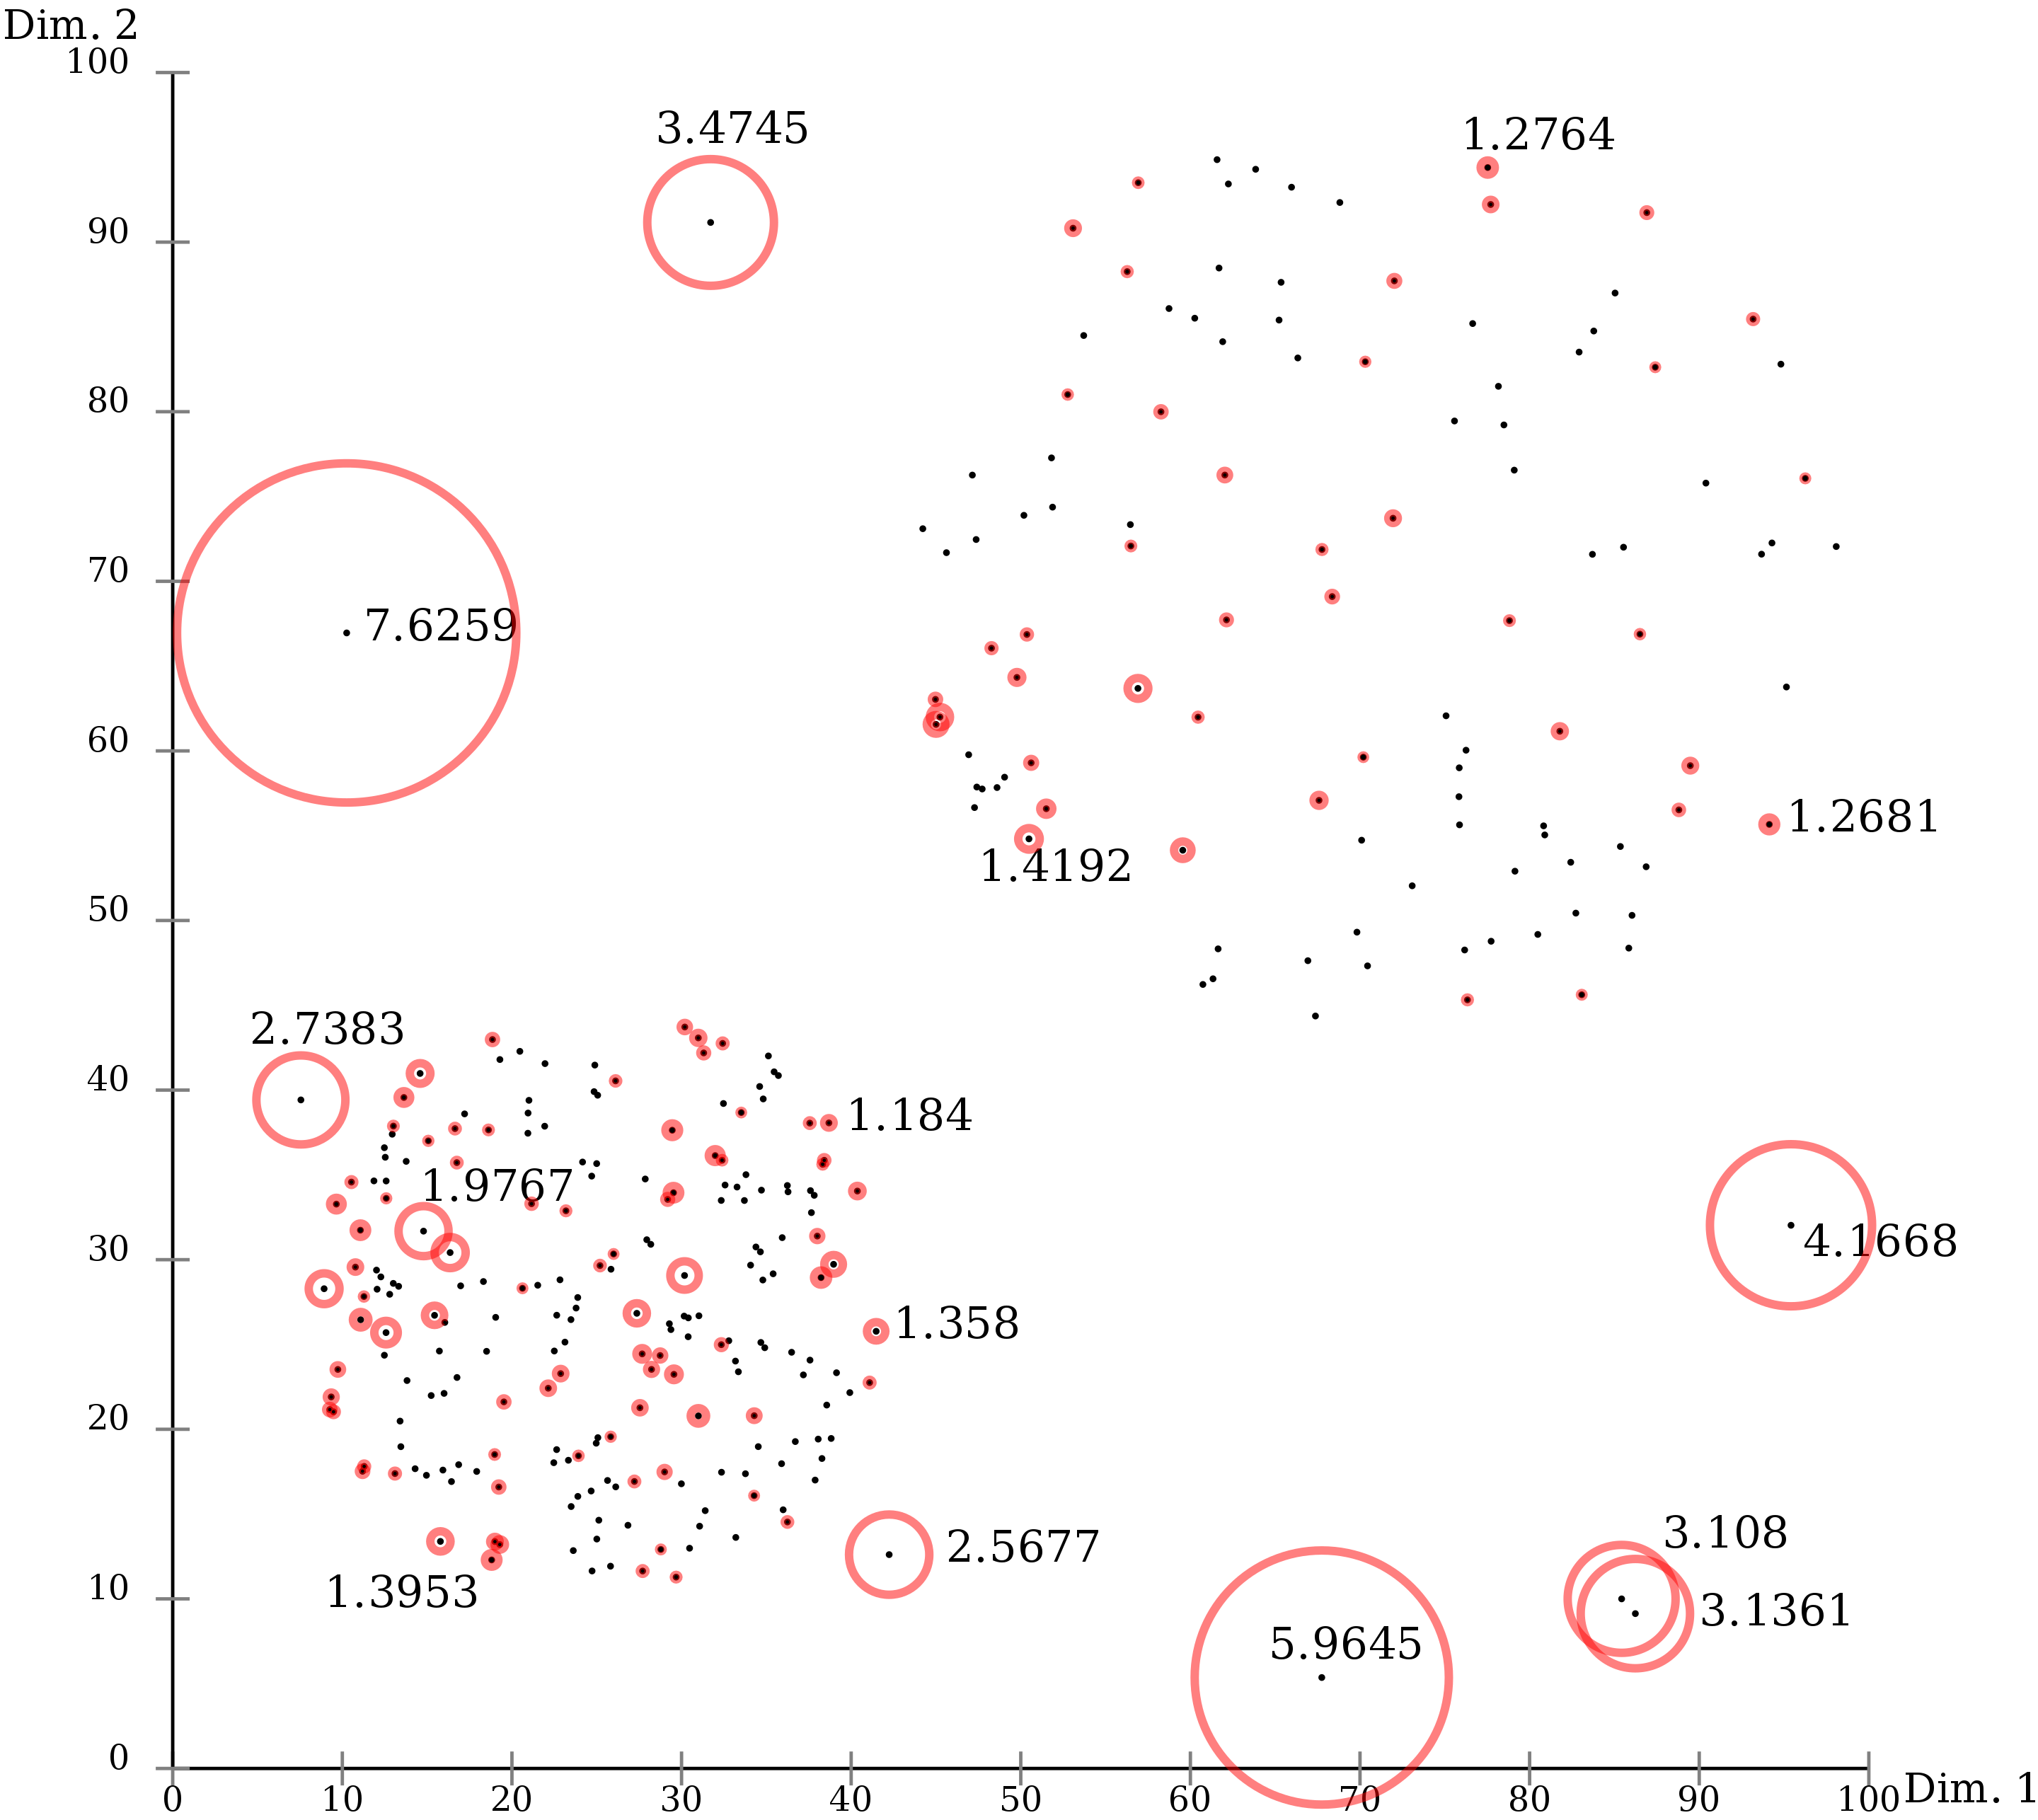

In [23]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [24]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-1.06494429, -0.97837293, -1.02662228, -0.99883896, -1.23085318])

In [25]:
np.sort(df_scores)[0:5]

array([-2.7111289 , -2.50181408, -2.07084555, -2.01967551, -1.9648059 ])

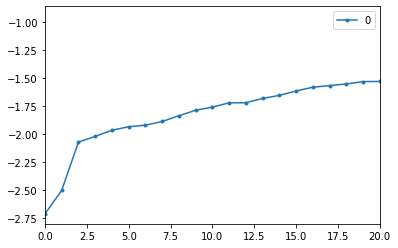

In [26]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show(block=True)

In [27]:
th = np.sort(df_scores)[2] # I choose 2 because in 2 there is the biggest change in the graph

In [28]:
df[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1.000,189.000,60.000,23.000,846.000,30.100,0.398,59.000,1.000
445,0.000,180.000,78.000,63.000,14.000,59.400,2.420,25.000,1.000


In [29]:
df[df_scores < th].shape

(2, 9)

In [30]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index) # dropping outliers in the dataframe
df.shape

(768, 9)

##### Checking correlation:

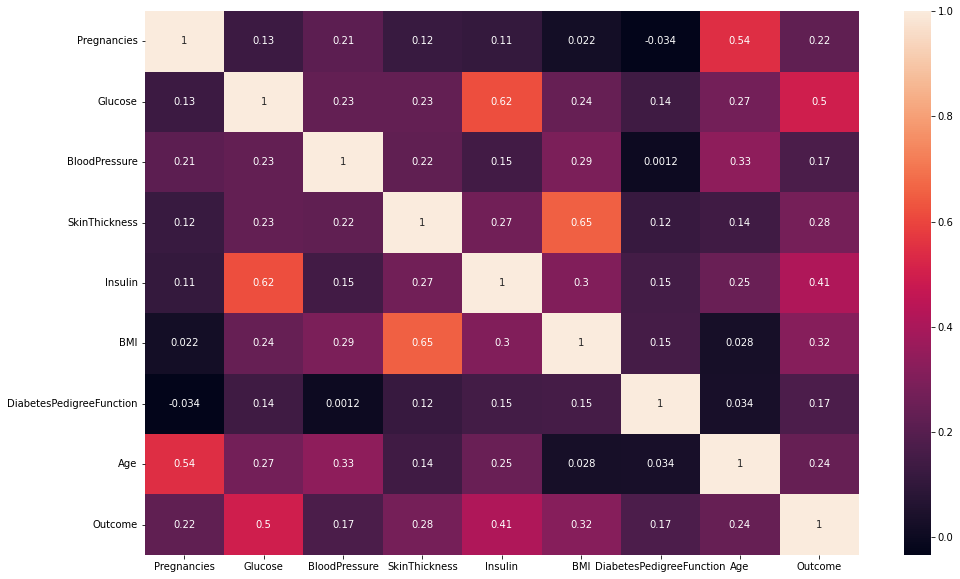

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True);

## 7. Feature Engineering

In [32]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                72
SkinThickness               161
Insulin                     490
BMI                         256
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,121.673,30.527,44.000,99.000,117.000,141.000,199.000
BloodPressure,768.000,72.307,12.184,24.000,64.000,72.000,80.000,122.000
SkinThickness,768.000,29.104,9.435,7.000,22.950,29.000,35.000,99.000
Insulin,768.000,153.339,98.293,14.000,89.200,130.000,188.800,846.000
BMI,768.000,32.418,6.900,18.200,27.400,32.150,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


##### Categorical Age:

In [34]:
df['Categorical_Age']=pd.cut(df['Age'],bins=[
    df['Age'].min()-1,35,50,df['Age'].max()],labels=['young','mature','senior'])
df.groupby('Categorical_Age').agg({'Outcome':['mean','count']})

Outcome      
                   mean count
Categorical_Age              
young             0.263   498
mature            0.524   189
senior            0.469    81

##### Categorical BMI:

In [35]:
df['Categorical_BMI']=pd.cut(df['BMI'],
                             bins=[0,18.4,24.9,29.9,34.9,39.9,df['BMI'].max()]
                             ,labels=['Under_weight','Normal_weight','Pre-obesity',
                                      'Obesity_class_I','Obesity_class_II',
                                      'Obesity_class_III'])
df.groupby('Categorical_BMI').agg({'Outcome':['mean','count']})

Outcome      
                     mean count
Categorical_BMI                
Under_weight        0.000     4
Normal_weight       0.068   103
Pre-obesity         0.219   183
Obesity_class_I     0.452   228
Obesity_class_II    0.414   152
Obesity_class_III   0.561    98

##### Categorical Glucose:

In [36]:
df['Categorical_Glucose']=pd.cut(df['Glucose'],bins=[0,140,200,df['Insulin'].max()]
                                 ,labels=['Normal','Prediabetes','Diabetes'])
df.groupby('Categorical_Glucose').agg({'Outcome':['mean','count']})

Outcome      
                       mean count
Categorical_Glucose              
Normal                0.233   574
Prediabetes           0.691   194
Diabetes                NaN     0

In [37]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Categorical_Age             0
Categorical_BMI             0
Categorical_Glucose         0
dtype: int64

##### Categorical Blood Pressure:

In [38]:
df['Categorical_BloodPressure'] = pd.cut(df['BloodPressure'], bins = [0,80, 90, 120,200], 
                                         labels=["Normal", "Hypertension_Stage1","Hypertension_Stage2", 
                                          "Hypertensive_Crisis"])
df.groupby('Categorical_BloodPressure').agg({'Outcome':['mean','count']})

Outcome      
                             mean count
Categorical_BloodPressure              
Normal                      0.315   562
Hypertension_Stage1         0.435   168
Hypertension_Stage2         0.486    37
Hypertensive_Crisis         0.000     1

##### Categorical İnsulin:

In [39]:
df['Categorical_Insulin']=pd.cut(df['Insulin'],bins=[0,100,126,df['Insulin'].max()],
                                 labels=['Low_Anormal','Normal','High_Anormal'])
df.groupby('Categorical_Insulin').agg({'Outcome':['mean','count']})

Outcome      
                       mean count
Categorical_Insulin              
Low_Anormal           0.078   243
Normal                0.202   119
High_Anormal          0.554   406

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Age,Categorical_BMI,Categorical_Glucose,Categorical_BloodPressure,Categorical_Insulin
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000,mature,Obesity_class_I,Prediabetes,Normal,High_Anormal
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000,young,Pre-obesity,Normal,Normal,Low_Anormal
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000,young,Normal_weight,Prediabetes,Normal,High_Anormal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,young,Pre-obesity,Normal,Normal,Low_Anormal
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000,young,Obesity_class_III,Normal,Normal,High_Anormal


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Pregnancies                768 non-null    float64 
 1   Glucose                    768 non-null    float64 
 2   BloodPressure              768 non-null    float64 
 3   SkinThickness              768 non-null    float64 
 4   Insulin                    768 non-null    float64 
 5   BMI                        768 non-null    float64 
 6   DiabetesPedigreeFunction   768 non-null    float64 
 7   Age                        768 non-null    float64 
 8   Outcome                    768 non-null    float64 
 9   Categorical_Age            768 non-null    category
 10  Categorical_BMI            768 non-null    category
 11  Categorical_Glucose        768 non-null    category
 12  Categorical_BloodPressure  768 non-null    category
 13  Categorical_Insulin        768 non-

We have categories now in our dataframe, so we can do One-Hot Encoding. 

## 8. One-Hot Encoding

In [42]:
# sample:
pd.get_dummies(df, columns=["Categorical_Age", "Categorical_BMI"], drop_first=True).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Glucose,Categorical_BloodPressure,Categorical_Insulin,Categorical_Age_mature,Categorical_Age_senior,Categorical_BMI_Normal_weight,Categorical_BMI_Pre-obesity,Categorical_BMI_Obesity_class_I,Categorical_BMI_Obesity_class_II,Categorical_BMI_Obesity_class_III
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000,Prediabetes,Normal,High_Anormal,1,0,0,0,1,0,0
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000,Normal,Normal,Low_Anormal,0,0,0,1,0,0,0
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000,Prediabetes,Normal,High_Anormal,0,0,1,0,0,0,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,Normal,Normal,Low_Anormal,0,0,0,1,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000,Normal,Normal,High_Anormal,0,0,0,0,0,0,1


In [43]:
# one-hot encoding function:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 14
cat_cols: 6
num_cols: 8
cat_but_car: 0
num_but_cat: 6


In [45]:
cat_cols

['Outcome',
 'Categorical_Age',
 'Categorical_BMI',
 'Categorical_Glucose',
 'Categorical_BloodPressure',
 'Categorical_Insulin']

In [46]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['Categorical_Age',
 'Categorical_BMI',
 'Categorical_BloodPressure',
 'Categorical_Insulin']

In [47]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Glucose,Categorical_Age_mature,Categorical_Age_senior,Categorical_BMI_Normal_weight,Categorical_BMI_Pre-obesity,Categorical_BMI_Obesity_class_I,Categorical_BMI_Obesity_class_II,Categorical_BMI_Obesity_class_III,Categorical_BloodPressure_Hypertension_Stage1,Categorical_BloodPressure_Hypertension_Stage2,Categorical_BloodPressure_Hypertensive_Crisis,Categorical_Insulin_Normal,Categorical_Insulin_High_Anormal
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000,Prediabetes,1,0,0,0,1,0,0,0,0,0,0,1
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000,Normal,0,0,0,1,0,0,0,0,0,0,0,0
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000,Prediabetes,0,0,1,0,0,0,0,0,0,0,0,1
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,Normal,0,0,0,1,0,0,0,0,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000,Normal,0,0,0,0,0,0,1,0,0,0,0,1


### 8.1 Label Encoding

In [48]:
lbe=LabelEncoder()

In [49]:
df['Categorical_Glucose']=lbe.fit_transform(df['Categorical_Glucose'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Glucose,Categorical_Age_mature,Categorical_Age_senior,Categorical_BMI_Normal_weight,Categorical_BMI_Pre-obesity,Categorical_BMI_Obesity_class_I,Categorical_BMI_Obesity_class_II,Categorical_BMI_Obesity_class_III,Categorical_BloodPressure_Hypertension_Stage1,Categorical_BloodPressure_Hypertension_Stage2,Categorical_BloodPressure_Hypertensive_Crisis,Categorical_Insulin_Normal,Categorical_Insulin_High_Anormal
0,6.000,148.000,72.000,35.000,334.200,33.600,0.627,50.000,1.000,1,1,0,0,0,1,0,0,0,0,0,0,1
1,1.000,85.000,66.000,29.000,56.200,26.600,0.351,31.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8.000,183.000,64.000,32.200,238.000,23.300,0.672,32.000,1.000,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1.000,0,0,0,0,0,0,0,1,0,0,0,0,1


## 9. Standardizing for Numeric Variables

In [50]:
scaler=StandardScaler()

In [51]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [52]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Glucose,Categorical_Age_mature,Categorical_Age_senior,Categorical_BMI_Normal_weight,Categorical_BMI_Pre-obesity,Categorical_BMI_Obesity_class_I,Categorical_BMI_Obesity_class_II,Categorical_BMI_Obesity_class_III,Categorical_BloodPressure_Hypertension_Stage1,Categorical_BloodPressure_Hypertension_Stage2,Categorical_BloodPressure_Hypertensive_Crisis,Categorical_Insulin_Normal,Categorical_Insulin_High_Anormal
0,0.640,0.863,-0.025,0.625,1.841,0.171,0.468,1.426,1.000,1,1,0,0,0,1,0,0,0,0,0,0,1
1,-0.845,-1.202,-0.518,-0.011,-0.989,-0.844,-0.365,-0.191,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.234,2.010,-0.682,0.328,0.862,-1.322,0.604,-0.106,1.000,1,0,0,1,0,0,0,0,0,0,0,0,1
3,-0.845,-1.071,-0.518,-0.647,-0.604,-0.626,-0.921,-1.042,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.142,0.502,-2.653,0.625,0.149,1.549,5.485,-0.020,1.000,0,0,0,0,0,0,0,1,0,0,0,0,1


## 10. Model Building

In [54]:
primitive_success=[]
model_names=[]
y=df['Outcome']
X=df.drop('Outcome',axis=1)
# Creating a Training Set and a Test Set from the Original Data Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

def ML(algName):

    # Model Building / Training
    model=algName().fit(X_train,y_train)
    model_name=algName.__name__
    model_names.append(model_name)
    # Prediction
    y_pred=model.predict(X_test)
    # primitive-Success / Verification Score
    from sklearn.metrics import accuracy_score
    primitiveSuccess=accuracy_score(y_test,y_pred)
    primitive_success.append(primitiveSuccess)
    return  primitive_success,model_names,model

In [55]:
models=[KNeighborsClassifier,SVC,MLPClassifier,DecisionTreeClassifier,
        RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
for i in models:
    ML(i)


classification_Data=pd.DataFrame( primitive_success,columns=
                                 ['accuracy_Score'],index=[model_names]).sort_values(by='accuracy_Score',
                                                                                     ascending=False)
classification_Data

,accuracy_Score
MLPClassifier,0.801
RandomForestClassifier,0.801
KNeighborsClassifier,0.797
LGBMClassifier,0.792
SVC,0.788
GradientBoostingClassifier,0.775
XGBClassifier,0.775
DecisionTreeClassifier,0.727


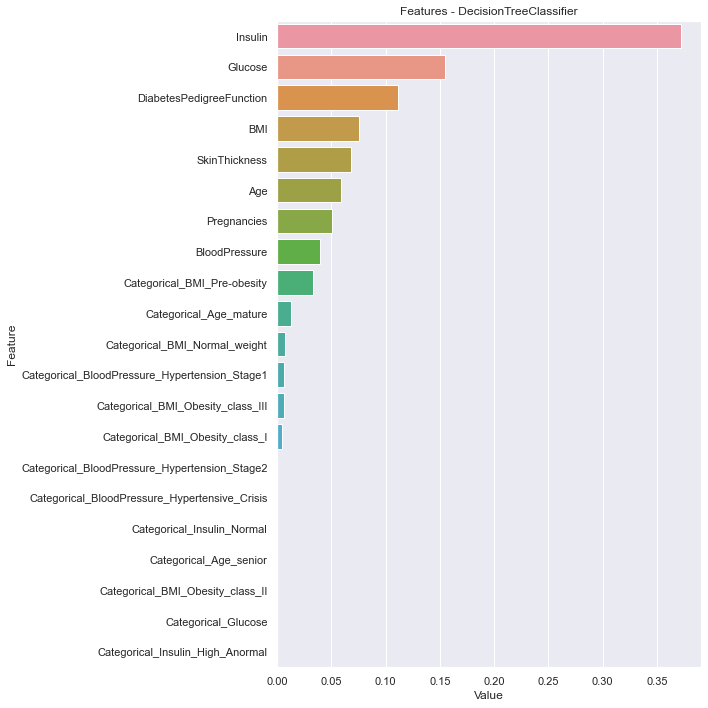

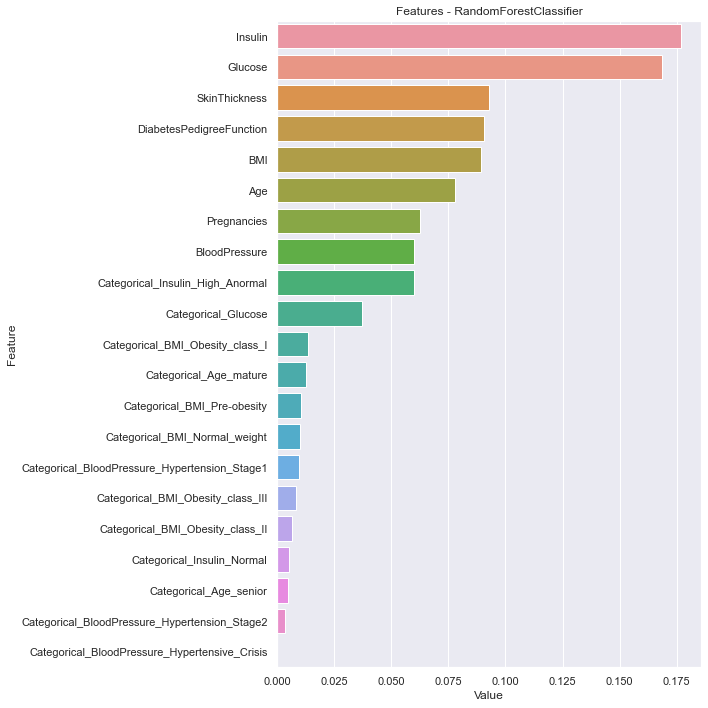

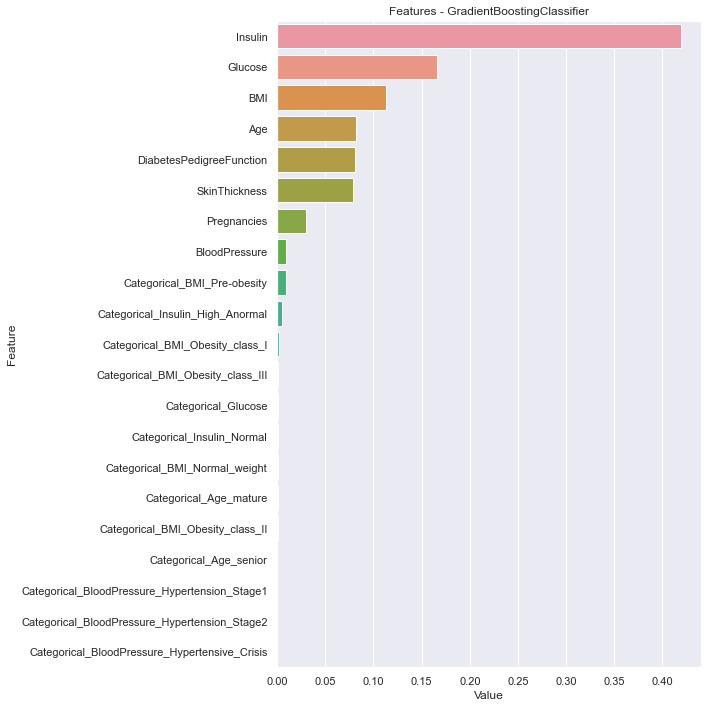

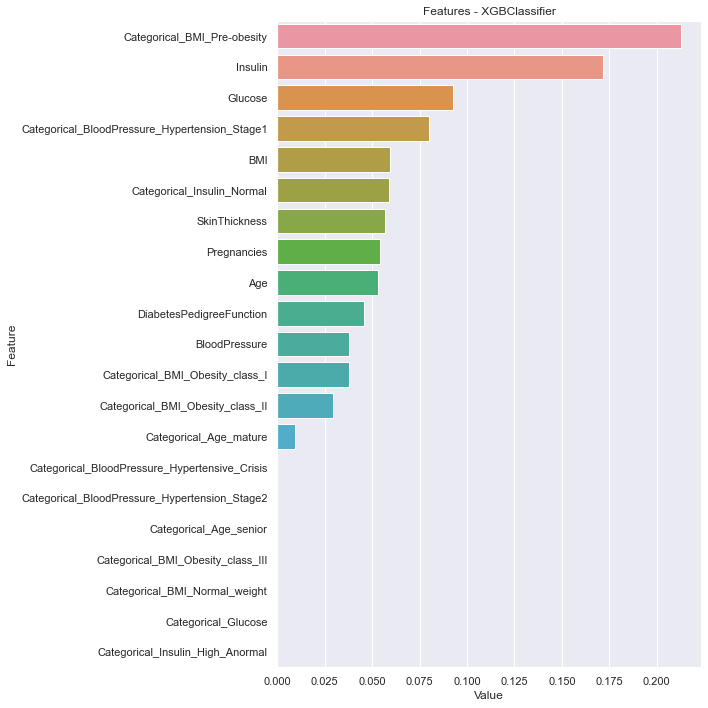

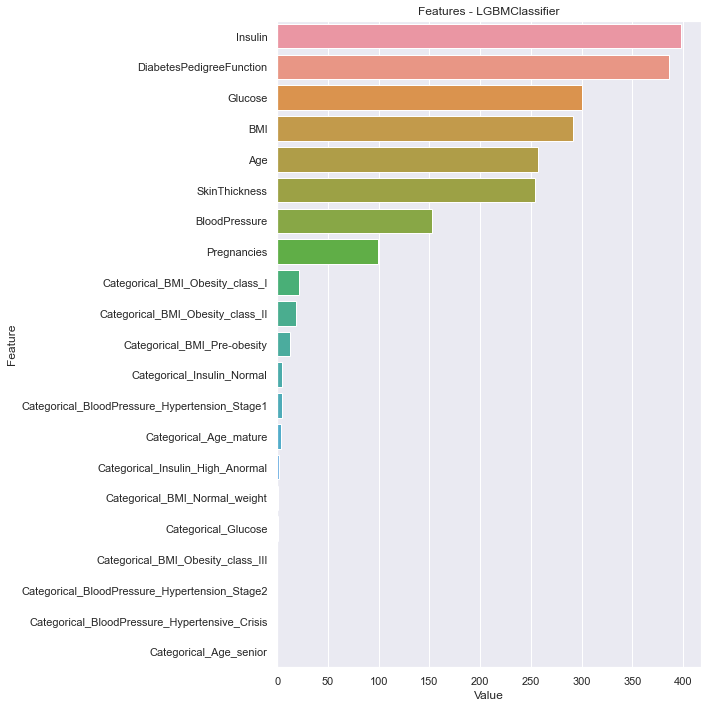

In [56]:
primitive_success=[]
model_names=[]
y=df['Outcome']
X=df.drop('Outcome',axis=1)
# Creating a Training Set and a Test Set from the Original Data Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

def plot_importance(model, features,modelName, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                          ascending=False)[0:num])
    plt.title('Features'+ ' - ' + modelName.__name__ )
    plt.tight_layout()
    plt.show()

for i in models[3:]:
    model=i().fit(X_train,y_train)
    plot_importance(model, X_train,i)

Hope it will be useful :)

[Linkedin](https://www.linkedin.com/in/demir-zumrut/)